### YipitData - Groupon Analysis
#### 04/05/2019

This report is an analysis of alternative data for Groupon. The report is divided into two parts: first is a sell-buy recommendation based on estimates of Groupon's billings for Q4 2013, and the second is a solution for removing duplicated deals from Groupon's deals in Belgium for March 2015.

##### Part 1

In [1]:
#load liberaries that are needed for the report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
#first dataframe is the historical data of Groupon between Q3 2012 and Q3 2013 split by products: Local, Goods, travel

df_hist = pd.read_excel(open('Q4_2013_Groupon_North_America_Data_XLSX.xlsx', 'rb'), sheet_name='Historical Data')
df_hist.head()

,Q3 2012,Unnamed: 1,Unnamed: 2,Q4 2012,Unnamed: 4,Unnamed: 5,Q1 2013,Unnamed: 7,Unnamed: 8,Q2 2013,Unnamed: 10,Unnamed: 11,Q3 2013,Unnamed: 13,Unnamed: 14
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00,2012-12-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00
Billings ($ million),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Local,133.415,137.322,138.2,126.8,139.9,164.4,162.7,143,163.4,143.8,162.2,153.2,139.951,136.668,133.795
Goods,26.7339,33.0089,50.8,64.3,85.1,64.3,47.3,46,51,62.8,71.7,67.1,61.28,67.025,63.195


In [3]:
#The following two tables are for the billings of Groupon first split by month and the second split by quarter

df_hist_billings = df_hist.iloc[:7, :]
df_hist_billings = df_hist_billings.transpose()
df_hist_billings.reset_index(inplace=True)
df_hist_billings.columns = ['Quarters', 'Drop', 'Months', 'Billings', 'Local', 'Goods', 'Travel', 'Total']
df_hist_billings.drop(['Drop', 'Billings'], axis=1, inplace=True)
df_hist_billings['Quarters'] = ['Q3 2012','Q3 2012','Q3 2012','Q4 2012','Q4 2012','Q4 2012','Q1 2013','Q1 2013','Q1 2013','Q2 2013','Q2 2013','Q2 2013','Q3 2013','Q3 2013','Q3 2013']
df_hist_billings.set_index(['Quarters', 'Months'], inplace=True)

df_hist_billings

Local    Goods   Travel    Total
Quarters Months                                        
Q3 2012  2012-07-01  133.415  26.7339  16.7708  176.919
         2012-08-01  137.322  33.0089  15.4366  185.767
         2012-09-01    138.2     50.8     14.3    203.3
Q4 2012  2012-10-01    126.8     64.3     16.6    207.7
         2012-11-01    139.9     85.1     14.6    239.6
         2012-12-01    164.4     64.3     18.5    247.2
Q1 2013  2013-01-01    162.7     47.3     22.6    232.6
         2013-02-01      143       46     13.6    202.6
         2013-03-01    163.4       51     20.3    234.7
Q2 2013  2013-04-01    143.8     62.8     18.9    225.5
         2013-05-01    162.2     71.7     22.9    256.8
         2013-06-01    153.2     67.1     22.8    243.1
Q3 2013  2013-07-01  139.951    61.28  22.4045  223.636
         2013-08-01  136.668   67.025  22.7389  226.432
         2013-09-01  133.795   63.195  21.7357  218.726

In [4]:
#quarter billings

df_qua_billings = df_hist_billings.groupby(level=[0]).sum()
df_qua_billings = df_qua_billings.reindex(["Q3 2012", "Q4 2012", "Q1 2013", "Q2 2013", "Q3 2013"])

df_qua_billings

,Local,Goods,Travel,Total
Quarters,,,,
Q3 2012,408.936466,110.542824,46.507411,565.986701
Q4 2012,431.100000,213.700000,49.700000,694.500000
Q1 2013,469.100000,144.300000,56.500000,669.900000
Q2 2013,459.200000,201.600000,64.600000,725.400000
Q3 2013,410.414233,191.499949,66.879079,668.793262


In [5]:
#The following two tables are for the units sold of Groupon first split by month and the second split by quarter

df_hist_units = df_hist.iloc[8:16, :]
df_hist_units = df_hist_units.transpose()
df_hist_units.reset_index(inplace=True)
df_hist_units.columns = ['Quarters', 'Drop', 'Drop2', 'Months', 'Billings', 'Local', 'Goods', 'Travel', 'Total']
df_hist_units.drop(['Drop', 'Drop2', 'Billings'], axis=1, inplace=True)
df_hist_units['Quarters'] = ['Q3 2012','Q3 2012','Q3 2012','Q4 2012','Q4 2012','Q4 2012','Q1 2013','Q1 2013','Q1 2013','Q2 2013','Q2 2013','Q2 2013','Q3 2013','Q3 2013','Q3 2013']
df_hist_units.set_index(['Quarters', 'Months'], inplace=True)

df_hist_units

Local        Goods   Travel        Total
Quarters Months                                                    
Q3 2012  2012-07-01   4.4008e+06       855156  61283.4  5.31724e+06
         2012-08-01  4.23371e+06  1.16288e+06  84984.5  5.48158e+06
         2012-09-01  4.99181e+06  1.62982e+06  60253.5  6.68189e+06
Q4 2012  2012-10-01  5.17744e+06   1.8797e+06  74358.4  7.13149e+06
         2012-11-01  4.92038e+06  2.58317e+06  87332.6  7.59088e+06
         2012-12-01  5.50218e+06  1.91578e+06  93702.6  7.51167e+06
Q1 2013  2013-01-01  5.33032e+06  1.59674e+06  84821.5  7.01188e+06
         2013-02-01  4.82377e+06  1.49129e+06  55029.8  6.37009e+06
         2013-03-01  5.53098e+06  1.68506e+06  84685.8  7.30072e+06
Q2 2013  2013-04-01   4.8077e+06  2.47016e+06   102091  7.37995e+06
         2013-05-01   5.5928e+06  2.72633e+06   144592  8.46372e+06
         2013-06-01   5.7558e+06  2.65134e+06   142509  8.54965e+06
Q3 2013  2013-07-01  4.99624e+06  2.26794e+06   103021  7.36721e+06
         2013-08-01  4.90236e+06  2.47156e+06   108412  7.48234e+06
         2013-09-01  4.96746e+06  2.34684e+06   105752  7.42005e+06

In [6]:
#quarter units sold

df_qua_units = df_hist_units.groupby(level=[0]).sum()
df_qua_units = df_qua_units.reindex(["Q3 2012", "Q4 2012", "Q1 2013", "Q2 2013", "Q3 2013"])

df_qua_units

,Local,Goods,Travel,Total
Quarters,,,,
Q3 2012,1.362633e+07,3.647863e+06,206521.400000,1.748071e+07
Q4 2012,1.560000e+07,6.378652e+06,255393.540000,2.223404e+07
Q1 2013,1.568507e+07,4.773079e+06,224537.120000,2.068269e+07
Q2 2013,1.615629e+07,7.847825e+06,389191.840000,2.439331e+07
Q3 2013,1.486606e+07,7.086349e+06,317184.480074,2.226960e+07


In [7]:
#The following two tables are for the number of deals of Groupon first split by month and the second split by quarter

df_hist_deals = df_hist.iloc[17:, :]
df_hist_deals = df_hist_deals.transpose()
df_hist_deals.reset_index(inplace=True)
df_hist_deals.columns = ['Quarters', 'Drop', 'Drop2', 'Months', 'Billings', 'Local', 'Goods', 'Travel', 'Total']
df_hist_deals.drop(['Drop', 'Drop2', 'Billings'], axis=1, inplace=True)
df_hist_deals['Quarters'] = ['Q3 2012','Q3 2012','Q3 2012','Q4 2012','Q4 2012','Q4 2012','Q1 2013','Q1 2013','Q1 2013','Q2 2013','Q2 2013','Q2 2013','Q3 2013','Q3 2013','Q3 2013']
df_hist_deals.set_index(['Quarters', 'Months'], inplace=True)

df_hist_deals

Local Goods Travel  Total
Quarters Months                               
Q3 2012  2012-07-01  13543   334    211  14088
         2012-08-01  12926   448    277  13651
         2012-09-01  12814   525    217  13556
Q4 2012  2012-10-01  14544   770    262  15576
         2012-11-01  13914  1079    270  15263
         2012-12-01  15374  1310    334  17018
Q1 2013  2013-01-01  12375   992    243  13610
         2013-02-01  11846  1197    188  13231
         2013-03-01  13041  1499    205  14745
Q2 2013  2013-04-01  10790  1755    329  12874
         2013-05-01  14281  2185    471  16937
         2013-06-01  13815  2610    458  16883
Q3 2013  2013-07-01  14173  2796    506  17475
         2013-08-01  13075  2887    537  16499
         2013-09-01  10670  2847    571  14088

In [8]:
#quarter deals

df_qua_deals = df_hist_deals.groupby(level=[0]).sum()
df_qua_deals = df_qua_deals.reindex(["Q3 2012", "Q4 2012", "Q1 2013", "Q2 2013", "Q3 2013"])

df_qua_deals

,Local,Goods,Travel,Total
Quarters,,,,
Q3 2012,39283,1307,705,41295
Q4 2012,43832,3159,866,47857
Q1 2013,37262,3688,636,41586
Q2 2013,38886,6550,1258,46694
Q3 2013,37918,8530,1614,48062


In [9]:
#loading the raw data for Q4 2013 that includes billings and units sold from all the deals during that period

df_raw = pd.read_excel(open('Q4_2013_Groupon_North_America_Data_XLSX.xlsx', 'rb'), sheet_name='Q4 2013 Raw Data')
df_raw.columns = ['deal_id', 'units_sold', 'billings', 'start_date', 'deal_url', 'segment', 'inventory_type']
df_raw.sort_values(by='start_date', inplace=True)
df_raw.head()

,deal_id,units_sold,billings,start_date,deal_url,segment,inventory_type
0,gr-millevois-tire-service-center,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local,Third - Party
1,gr-manakeesh-cafe-bakery,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local,Third - Party
2,gr-phoenix-salon-and-spa,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local,Third - Party
3,gr-hands-in-motion,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local,Third - Party
4,dc-fd2-bartending-college-allentown-reading,86.8,4253.2,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local,Third - Party


The below is a quality assurance test that checks whether an observation exists where either the units sold or the billings are zero but not the other. It would be an anomaly, but that is not the case. Moreover, the third test shows that there are 4374 observations with negative units sold and billings, and that is fine since negative numbers refer to refunds.

In [10]:
df_raw.query('units_sold == 0.0 and billings != 0.0')

,deal_id,units_sold,billings,start_date,deal_url,segment,inventory_type


In [11]:
df_raw.query('units_sold != 0.0 and billings == 0.0')

,deal_id,units_sold,billings,start_date,deal_url,segment,inventory_type


In [12]:
df_raw.query('units_sold < 0.0 or billings < 0.0').count()

deal_id           4374
units_sold        4374
billings          4374
start_date        4374
deal_url          4374
segment           4374
inventory_type    4374
dtype: int64

In [13]:
#This is a helper fuction that would aggregate the deals of each segment from the raw data by day so we can estimate 
#any missing data by day using standard imputation methods later on

def BillByDay(df):
    df_out = pd.DataFrame(columns=['start_date', 'units_sold', 'billings'])
    
    for i in range(len(df['start_date'].unique())):
        df_delta = df[df['start_date'] == df['start_date'].unique()[i]]
        df_out.loc[i] = [df['start_date'].unique()[i], sum(df_delta['units_sold']), sum(df_delta['billings'])]
        
    return(df_out)

In [14]:
#This cell generates the timestamps for the days of all Q4 2013, it is needed for a sanity check later on in this part

import datetime

start = datetime.datetime.strptime("01-10-2013", "%d-%m-%Y")
end = datetime.datetime.strptime("01-01-2014", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
date_generated = pd.DataFrame(date_generated)

The analysis of the Groupon data is going to be split into three subsections, one for each product segment: Goods, Travel, and Local. First, we extract the data for each segment from the raw data, then we aggregate over the data by day. So the output dataset is the total billings and units sold per start date of the deals. This aggregation allows us to determine if there are systematic missing days in the raw data and then estimate them. It is good to note here that we are assuming that even the deals that have a start date before the Q4 2013, the billings and the units sold recorded occurred during that period. After that, we check if any of the start dates generated in the above cell - these are dates during Q4 2013 - is missing from the dataset. If no data is missing, then we sum the billings column to get the total billings of the specific segment for Q4 2013. The same calculation is used for the total units sold. The number of new deals is the count of deals that start between 10-01-2013 and 12-31-2013. In case of missing data, we deal with it accordingly with a specific explanation.

###### Part 1: Goods Product Analysis

In [15]:
#This the raw data for the Goods products

df_raw_goods = df_raw.query('segment == "Goods"')
df_raw_goods.reset_index(inplace=True, drop=True)
df_raw_goods.head()

,deal_id,units_sold,billings,start_date,deal_url,segment,inventory_type
0,gg-two-lumps-of-sugar-aprons,6.639180e+02,1.244360e+04,2012-10-30,http://www.groupon.com/deals/gg-two-lumps-of-s...,Goods,First - Party
1,gg-ca-womens-fleece-pajama-pants,0.000000e+00,0.000000e+00,2013-03-25,http://www.groupon.com/deals/gg-ca-womens-flee...,Goods,First - Party
2,gg-ca-breda-mens-watches,-2.655653e-15,-2.157208e-13,2013-03-25,http://www.groupon.com/deals/gg-ca-breda-mens-...,Goods,First - Party
3,gg-ca-betsey-johnson-belted-cape,6.670000e+00,2.867433e+02,2013-03-25,http://www.groupon.com/deals/gg-ca-betsey-john...,Goods,First - Party
4,gg-jessica-simpson-capelets,-1.748000e+01,-9.612252e+02,2013-03-26,http://www.groupon.com/deals/gg-jessica-simpso...,Goods,First - Party


In [16]:
#billings and units sold from deals by day for goods products

df_cu_goods = BillByDay(df_raw_goods)
df_cu_goods.head()

,start_date,units_sold,billings
0,2012-10-30,663.918,12443.59800
1,2013-03-25,6.670,286.74330
2,2013-03-26,-9.476,-894.60524
3,2013-03-27,69.046,2565.74154
4,2013-03-28,1.334,11.99266


In [17]:
for i in date_generated[0]:
    if i not in set(df_cu_goods.start_date):
        print(i)
#since nothing is printed, we know that there are no missing data by day

In [18]:
goods_billings_q413 = sum(df_cu_goods.billings) #sum of the billings of all deals for Q4 2013
goods_units_q413 = sum(df_cu_goods.units_sold) #sum of the units sold of all deals for Q4 2013
goods_deals_q413 = df_raw_goods.query('start_date >= "2013-10-01"').count()[0] #count of new deals that started during Q4 2013

print(goods_billings_q413)
print(goods_units_q413)
print(goods_deals_q413)

282245671.0413201
10419746.304000001
12749


###### Part 1: Travel Product Analysis

In [19]:
#This the raw data for the Travel products

df_raw_travel = df_raw.query('segment == "Travel"')
df_raw_travel.reset_index(inplace=True, drop=True)
df_raw_travel.head()

,deal_id,units_sold,billings,start_date,deal_url,segment,inventory_type
0,ga-peach-maids,0.0,0.0,2013-03-12,http://www.groupon.com/deals/ga-peach-maids,Travel,Third - Party
1,ga-best-western-plus-plaza-hotel,10.9,643.1,2013-04-09,http://www.groupon.com/deals/ga-best-western-p...,Travel,Third - Party
2,ga-miramonte-resort-spa-3,-21.8,-3030.2,2013-04-09,http://www.groupon.com/deals/ga-miramonte-reso...,Travel,Third - Party
3,ga-creekwalk-inn-at-whisperwood-farm,-3.7,-83.8,2013-04-09,http://www.groupon.com/deals/ga-creekwalk-inn-...,Travel,Third - Party
4,ga-hotel-cuna-del-angel,2.9,1070.1,2013-04-09,http://www.groupon.com/deals/ga-hotel-cuna-del...,Travel,Third - Party


In [20]:
#billings and units sold from deals by day for travel products

df_cu_travel = BillByDay(df_raw_travel)
df_cu_travel.head()

,start_date,units_sold,billings
0,2013-03-12,0.00,0.00
1,2013-04-09,-14.60,-3738.20
2,2013-04-16,8.80,7444.40
3,2013-04-23,27.65,10386.25
4,2013-04-30,-13.10,5833.10


In [21]:
for i in date_generated[0]:
    if i not in set(df_cu_travel.start_date):
        print(i)
#some dates are printed here, but the dates don't seem systematic rather just slow market for 
#the travel segment of deals during these days

2013-10-05 00:00:00
2013-10-07 00:00:00
2013-10-09 00:00:00
2013-10-10 00:00:00
2013-10-12 00:00:00
2013-10-13 00:00:00
2013-10-14 00:00:00
2013-10-16 00:00:00
2013-10-19 00:00:00
2013-10-20 00:00:00
2013-10-21 00:00:00
2013-10-23 00:00:00
2013-10-24 00:00:00
2013-10-26 00:00:00
2013-10-28 00:00:00
2013-11-02 00:00:00
2013-11-03 00:00:00
2013-11-11 00:00:00


In [22]:
travel_billings_q413 = sum(df_cu_travel.billings) #sum of the billings of all deals for Q4 2013
travel_units_q413 = sum(df_cu_travel.units_sold) #sum of the units sold of all deals for Q4 2013
travel_deals_q413 = df_raw_travel.query('start_date >= "2013-10-01"').count()[0] #count of new deals that started during Q4 2013

print(travel_billings_q413)
print(travel_units_q413)
print(travel_deals_q413)

70552062.1245
378910.19999999995
2177


###### Part 1: Local Product Analysis

In [23]:
#This the raw data for the Local products

df_raw_local = df_raw.query('segment == "Local"')
df_raw_local.reset_index(inplace=True, drop=True)
df_raw_local.head()

,deal_id,units_sold,billings,start_date,deal_url,segment,inventory_type
0,gr-millevois-tire-service-center,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local,Third - Party
1,gr-manakeesh-cafe-bakery,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local,Third - Party
2,gr-phoenix-salon-and-spa,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local,Third - Party
3,gr-hands-in-motion,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local,Third - Party
4,dc-fd2-bartending-college-allentown-reading,86.8,4253.2,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local,Third - Party


In [24]:
#billings and units sold from deals by day for local products

df_cu_local = BillByDay(df_raw_local)
df_cu_local.head()

,start_date,units_sold,billings
0,2011-11-21,0.0,0.0
1,2012-06-06,86.8,4253.2
2,2012-06-26,490.5,9319.5
3,2012-07-01,0.0,0.0
4,2012-07-07,0.0,0.0


In [25]:
for i in date_generated[0]:
    if i not in set(df_cu_local.start_date):
        print(i)
#the printed dates seem a systematic error, where 11 consecutive days have no deals reported

2013-10-20 00:00:00
2013-10-21 00:00:00
2013-10-22 00:00:00
2013-10-23 00:00:00
2013-10-24 00:00:00
2013-10-25 00:00:00
2013-10-26 00:00:00
2013-10-27 00:00:00
2013-10-28 00:00:00
2013-10-29 00:00:00
2013-10-30 00:00:00


Although both the travel and the local segment have missing dates from the Q4 2013 period. We are assuming that only the local missing data needs imputation. The reason for this is because the appeared anomaly in the travel data is sporadic and inconsistent, which leads me to believe that this is not a systematic issue. However, the missing data in the local segment are continuous 11 days between the 20th Oct 2013 and the 30th Oct 2013, which leads me to believe that it is a systematic error and needs imputation of the data. This assessment could be revisited if our billings estimations seem to be irregular compared to other sources. 

Now in order to fix this issue, we can consider multiple techniques of an imputation of the data. The easiest option is to replace the missing data with the mean of billings and units sold for the missing days. Although this is an easy solution, we could either overestimate or underestimate the billings of the local segment. Since this segment is the most active segment when comes to Groupon's total billings, it is best to utilize more sophisticated techniques. Therefore, we build a linear regression model on the billing data with the start date data as the predictor. The linear regression model yields more accurate results than using the mean, but the model's prediction is just 50% certain of the predictions. This is why we build three more models to compare the prediction score of each. These models are AdaBoost, RandomForest, and DecisionTree. The AdaBoost yields the best result with a 78% accuracy on average. After that, we perform some testing and tuning to get the best AdaBoost model. This methodology is then applied to the units sold data as well. Finally, we add the sum of the predictions for the 11 missing data points with the rest of the dataset to get the final estimate of the billings and units sold for the local segment.

In [26]:
#this cell shows the mean of the billings and units sold, and we can see that the std of the data is too significant
#to only use the mean for the missing data. It would be an underestimation

df_cu_local.describe()

,units_sold,billings
count,504.000000,5.040000e+02
mean,27627.937007,8.119497e+05
std,42507.107830,1.112855e+06
min,-6784.500000,-1.605510e+05
25%,3416.425000,1.643394e+05
50%,10308.175000,4.007538e+05
75%,25109.975000,8.220484e+05
max,229183.250000,6.573350e+06


In [27]:
#this cell allows us to translate the date to an ordinal number that would help us build any machine learning algorithms

from datetime import datetime as dt

d = dt.strptime('2013-10-20', '%Y-%m-%d').date()
print(d.toordinal())

735161


In [28]:
#this is the dataframe that we need to predict when we have the best model

x_pred = pd.DataFrame({'time': np.arange(735161, 735172)})
x_pred

,time
0,735161
1,735162
2,735163
3,735164
4,735165
5,735166
6,735167
7,735168
8,735169
9,735170


In [29]:
#this is how we are translating all the start date column in our dataset into ordinal numbers

df_time = df_cu_local['start_date'].copy()

import datetime as dt
df_time = pd.to_datetime(df_time)
df_time=df_time.map(dt.datetime.toordinal)

d = {'time': df_time}

df_time_units = pd.DataFrame(d)

df_time_units.head()

,time
0,734462
1,734660
2,734680
3,734685
4,734691


In [30]:
#the first model: linear regression model, we can see it is only 50% accurate

from sklearn import linear_model

X = df_time_units
y = df_cu_local['billings']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)


print(lm.score(X,y))

0.5044290520042982


In [31]:
#this cell splits our data into training and testing data in order to train and test our models we build
#this is the AdaBoost model with an average of 78% accuracy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

counter = 0

for i in range(100):
    y = df_cu_local['billings']
    X = df_time_units
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    
    model = AdaBoostRegressor()
    model.fit(X_train, y_train)
    preds_ada = model.predict(X_test)
    counter += r2_score(y_test, preds_ada)

print(counter/100)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8024629117754525


In [32]:
#this cell splits our data into training and testing data in order to train and test our models we build
#this is the RandomForest model with an average of 76% accuracy

from sklearn.ensemble import RandomForestRegressor

counter = 0

for i in range(100):
    y = df_cu_local['billings']
    X = df_time_units
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds_rfr = model.predict(X_test)
    counter += r2_score(y_test, preds_rfr)

print(counter/100)

0.7867514071508137


In [33]:
#this cell splits our data into training and testing data in order to train and test our models we build
#this is the Decision Tree model with an average of 73% accuracy

from sklearn.tree import DecisionTreeRegressor

counter = 0

for i in range(100):
    y = df_cu_local['billings']
    X = df_time_units
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    preds_dtr = model.predict(X_test)
    counter += r2_score(y_test, preds_dtr)

print(counter/100)

0.6996775952080757


In [34]:
#this is a grid search to tune and better our AdaBoost model with changing the n_estimators and the learning rate, 
#which yeilds an average of 85% accuracy

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

y = df_cu_local['billings']
X = df_time_units
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

clf = AdaBoostRegressor()

# TODO: Create the parameters list you wish to tune.
parameters = {'n_estimators':[1,5,10,15,20,25,30],'learning_rate':[0.001,0.01,0.1,1,10,100]}

# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(r2_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the r2_score of the new model.
print('The training r2 score is', r2_score(best_train_predictions, y_train))
print('The testing r2 score is', r2_score(best_test_predictions, y_test))

# Let's also explore what parameters ended up being used in the new model.
best_clf

The training r2 score is 0.8275908403829373
The testing r2 score is 0.5561026086012739


AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=30, random_state=None)

In [35]:
#this cell takes the model from the grid search in the cell above and predict the values of 
#the 11 missing days and then sums them up

model = best_clf
model.fit(X_train, y_train)
preds_ada = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(mean_squared_error(y_test, preds_ada))
print(mean_absolute_error(y_test, preds_ada))
print(r2_score(y_test, preds_ada))

y_hat = model.predict(x_pred)
print(sum(y_hat))

426553296174.6997
294833.953222075
0.7329878505666694
34330516.483592585


Now we perform a grid search on an AdaBoost model to estimate the missing units sold, however, the r2 score is so low, which means the start dates are not a good predictor for the units sold. This is okay since the estimation with a bad predictor for AdaBoost model would still perform with about 70% accuracy later in the applied model.

In [36]:
#Same methods are applied to the units sold data

y = df_cu_local['units_sold']
X = df_time_units

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [37]:
clf = AdaBoostRegressor()

# TODO: Create the parameters list you wish to tune.
parameters = {'n_estimators':[1,10,20,30,40,50,100,200],'learning_rate':[0.001,0.01,0.1,1,10,100]}

# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(r2_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf_units = grid_fit.best_estimator_

# Fit the new model.
best_clf_units.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the r2_score of the new model.
print('The training r2 score is', r2_score(best_train_predictions, y_train))
print('The testing r2 score is', r2_score(best_test_predictions, y_test))

# Let's also explore what parameters ended up being used in the new model.
best_clf_units

The training r2 score is -0.5170139710189441
The testing r2 score is -0.6655692759038014


AdaBoostRegressor(base_estimator=None, learning_rate=0.001, loss='linear',
         n_estimators=200, random_state=None)

In [38]:
#although our grid search yeild an irrelevant tuning to the AdaBoost for the units sold data, we still got an avergae
#of 73% accuracy with predicting the units sold during these missing days

model = best_clf_units
model.fit(X_train, y_train)
preds_ada = model.predict(X_test)

print(mean_squared_error(y_test, preds_ada))
print(mean_absolute_error(y_test, preds_ada))
print(r2_score(y_test, preds_ada))

y_hat_units = model.predict(x_pred)
print(sum(y_hat_units))

892817629.0086228
16026.570734116749
0.7513597137578484
1291863.4437748902


In [39]:
local_billings_q413 = sum(df_cu_local.billings) + sum(y_hat)#sum of the billings of all deals for Q4 2013
local_units_q413 = sum(df_cu_local.units_sold) + sum(y_hat_units)#sum of the units sold of all deals for Q4 2013
local_deals_q413 = df_raw_local.query('start_date >= "2013-10-01"').count()[0]#count of new deals that started during Q4 2013

print(local_billings_q413)
print(local_units_q413)
print(local_deals_q413)

443553174.4655925
15216343.69512624
46980


In [40]:
#adding the billings estimates for local, goods, and travel segments to our dataframe by quarter

total_billings_q413 = local_billings_q413 + goods_billings_q413 + travel_billings_q413
df_qua_billings.loc['Q4 2013'] = [local_billings_q413/1000000, goods_billings_q413/1000000, travel_billings_q413/1000000, total_billings_q413/1000000]

df_qua_billings

,Local,Goods,Travel,Total
Quarters,,,,
Q3 2012,408.936466,110.542824,46.507411,565.986701
Q4 2012,431.100000,213.700000,49.700000,694.500000
Q1 2013,469.100000,144.300000,56.500000,669.900000
Q2 2013,459.200000,201.600000,64.600000,725.400000
Q3 2013,410.414233,191.499949,66.879079,668.793262
Q4 2013,443.553174,282.245671,70.552062,796.350908


In [41]:
#adding the units sold estimates for local, goods, and travel segments to our dataframe by quarter

total_units_q413 = local_units_q413 + goods_units_q413 + travel_units_q413
df_qua_units.loc['Q4 2013'] = [local_units_q413, goods_units_q413, travel_units_q413, total_units_q413]

df_qua_units

,Local,Goods,Travel,Total
Quarters,,,,
Q3 2012,1.362633e+07,3.647863e+06,206521.400000,1.748071e+07
Q4 2012,1.560000e+07,6.378652e+06,255393.540000,2.223404e+07
Q1 2013,1.568507e+07,4.773079e+06,224537.120000,2.068269e+07
Q2 2013,1.615629e+07,7.847825e+06,389191.840000,2.439331e+07
Q3 2013,1.486606e+07,7.086349e+06,317184.480074,2.226960e+07
Q4 2013,1.521634e+07,1.041975e+07,378910.200000,2.601500e+07


In [42]:
#adding the new deals estimates for local, goods, and travel segments to our dataframe by quarter

total_deals_q413 = local_deals_q413 + goods_deals_q413 + travel_deals_q413
df_qua_deals.loc['Q4 2013'] = [local_deals_q413, goods_deals_q413, travel_deals_q413, total_deals_q413]

df_qua_deals

#note here that although the number of new deals for the local segment should be underestimated, we are still getting a rise 
#in the number of the new deals compared to previous quarters, and this number is not as important as
#the billings and units sold

,Local,Goods,Travel,Total
Quarters,,,,
Q3 2012,39283,1307,705,41295
Q4 2012,43832,3159,866,47857
Q1 2013,37262,3688,636,41586
Q2 2013,38886,6550,1258,46694
Q3 2013,37918,8530,1614,48062
Q4 2013,46980,12749,2177,61906


Our estimates of the billings for local, goods, and travel segments are 445, 282, and 71 million dollars respectively). These estimates seem reasonable compared to estimates from JP Morgan (JPM), Morgan Stanley (MoS), and Deutsche Bank (DuB). Our estimate of the local segment is a bit underestimated compared to the average of all estimations, however, it is still in the margin of error. The estimation of the goods segment is overestimated but still in the margin of error, and the travel segment billings estimation seems to be in consensus with other firm's estimations.

    - Segment:         Local        Goods       Travel
    - Our estimation:   445          282          71
    - JPM estimation:   490          276          71
    - MoS estimation:   508          295          67
    - DuB estimation:   423          211          71
    - Avg estimation:   474          261          70
    
Given our estimates of the billings, units sold, and new deals of Groupon for Q4 2013, we can see in the graphs below that Groupon is increasing in every aspect. All billings from the three segments are on the rise. Even with the underestimation of the local segment compared to other firms' estimation, the billings of the local segment is still increasing from the past quarter. Thus, my recommendation is to buy Groupon's stock.

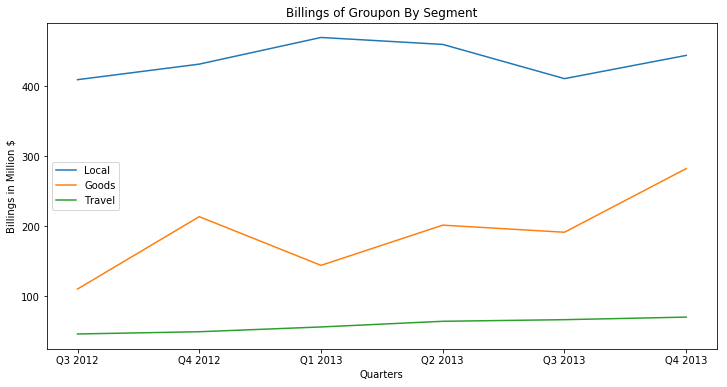

In [56]:
plt.figure(figsize=[12,6])
ticks_quarters = ["Q3 2012", "Q4 2012", "Q1 2013", "Q2 2013", "Q3 2013", "Q4 2013"]
plt.plot(ticks_quarters, df_qua_billings['Local'].reset_index(drop=True))
plt.plot(ticks_quarters, df_qua_billings['Goods'].reset_index(drop=True))
plt.plot(ticks_quarters, df_qua_billings['Travel'].reset_index(drop=True))
plt.legend()
plt.title('Billings of Groupon By Segment')
plt.xlabel('Quarters')
plt.ylabel('Billings in Million $');

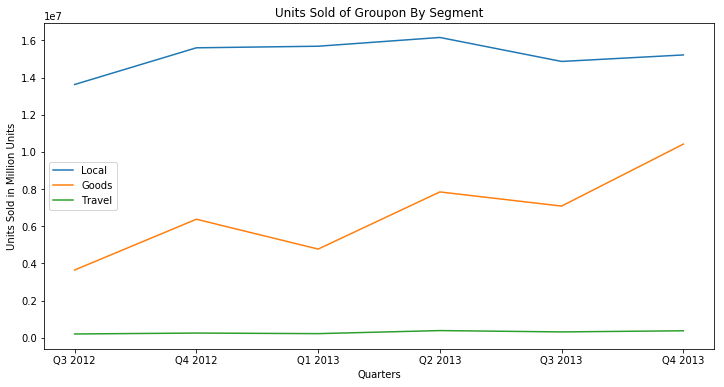

In [57]:
plt.figure(figsize=[12,6])
ticks_quarters = ["Q3 2012", "Q4 2012", "Q1 2013", "Q2 2013", "Q3 2013", "Q4 2013"]
plt.plot(ticks_quarters, df_qua_units['Local'].reset_index(drop=True))
plt.plot(ticks_quarters, df_qua_units['Goods'].reset_index(drop=True))
plt.plot(ticks_quarters, df_qua_units['Travel'].reset_index(drop=True))
plt.legend()
plt.title('Units Sold of Groupon By Segment')
plt.xlabel('Quarters')
plt.ylabel('Units Sold in Million Units');

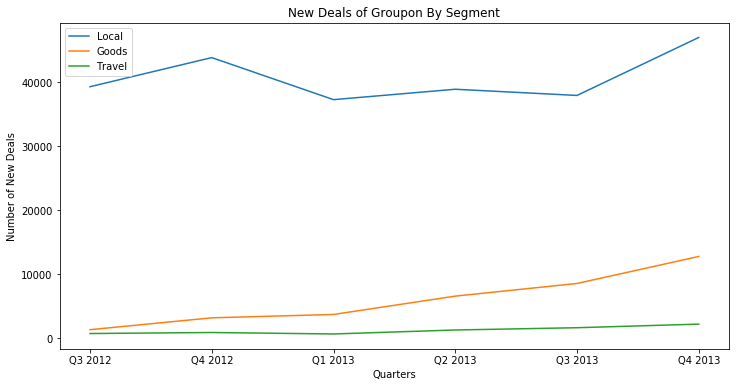

In [58]:
plt.figure(figsize=[12,6])
ticks_quarters = ["Q3 2012", "Q4 2012", "Q1 2013", "Q2 2013", "Q3 2013", "Q4 2013"]
plt.plot(ticks_quarters, df_qua_deals['Local'].reset_index(drop=True))
plt.plot(ticks_quarters, df_qua_deals['Goods'].reset_index(drop=True))
plt.plot(ticks_quarters, df_qua_deals['Travel'].reset_index(drop=True))
plt.legend()
plt.title('New Deals of Groupon By Segment')
plt.xlabel('Quarters')
plt.ylabel('Number of New Deals');

##### Part 2

This part is to detect the duplicated deals for the Groupon's deals in March 2015 from Belgium. The methodology used is based on splitting the deal URL and using the deals name and sub-name. For example:

- deal URL: http://www.groupon.be/deals/antwerpen_fr/abricot/38364572
- deal name: antwerpen_fr
- deal sub-name: abricot
- deal number: 38364572

The dataset is sorted by the deal URL, then the deal URL is split into three columns that are the deal's name, sub-name, and number. Then, the deal is considered to be duplicated if the deal's name, sub-name, billing amount, and units sold are the same unless it is the first one between the duplicated deals. The rest are considered valid. The technique used to find the duplicated deals is Pandas function 'duplicated()' that yields boolean outputs of true for duplicate and false for valid deals. That output is then translated to a valid/duplicate column called deals_status. We sanity check our work by comparing the total number of deals before with the sum of the total number of valid deals and the total number of duplicate deals. After that, we sum the total billings and units sold for the deals that are valid only. The total billings is EUR 6,027,920 and the total units sold are 4,472,507 with 45,923 valid deals.

In [46]:
#loading and cleaning the data for Groupon's March 2015 deals in Belgium (the data is sorted by the deal urls)

df_mar15 = pd.read_excel('Mar-15_groupon.be_Deals.xlsx')
df_mar15.columns = ['deal_url', 'units_sold', 'billings', 'obs_time']
df_mar15.sort_values(by='deal_url', inplace=True)
df_mar15.reset_index(inplace=True, drop=True)
df_mar15.head()

,deal_url,units_sold,billings,obs_time
0,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38
1,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:39
2,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38
3,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38
4,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38


In [47]:
#dissecting the deal url column into 3 columns that seperate the deal's name, sub-name, and identifying number

new = df_mar15['deal_url'].str.split("/", n = 6, expand = True) 
df_mar15['deal_name'] = new[4]
df_mar15['deal_sub_name'] = new[5]
df_mar15['deal_num'] = new[6]
  
df_mar15.head(10)

,deal_url,units_sold,billings,obs_time,deal_name,deal_sub_name,deal_num
0,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,antwerpen,-t-afslankhuys,30384719
1,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:39,antwerpen,-t-afslankhuys,32305333
2,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,antwerpen,-t-afslankhuys,32386223
3,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,antwerpen,-t-afslankhuys,32426135
4,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,antwerpen,-t-afslankhuys,32844520
5,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,antwerpen,-t-afslankhuys,33205870
6,http://www.groupon.be/deals/antwerpen/-t-fonte...,28,49.99,2015-03-31 07:19:47,antwerpen,-t-fonteintje,32654141
7,http://www.groupon.be/deals/antwerpen/-t-fonte...,28,49.99,2015-03-31 07:19:48,antwerpen,-t-fonteintje,32954950
8,http://www.groupon.be/deals/antwerpen/-t-fonte...,28,49.99,2015-03-31 07:19:46,antwerpen,-t-fonteintje,33205423
9,http://www.groupon.be/deals/antwerpen/-t-oud-w...,4,199.00,2015-03-30 06:48:19,antwerpen,-t-oud-wethuys,32526533


In [48]:
#taking subsection of the data into another dataframe; mainly the units sold, billings, name, and sub-name columns

df_change = df_mar15.copy()
df_change = df_change.loc[:,['units_sold', 'billings', 'deal_name', 'deal_sub_name']]
df_change.head()

,units_sold,billings,deal_name,deal_sub_name
0,79,74.99,antwerpen,-t-afslankhuys
1,79,74.99,antwerpen,-t-afslankhuys
2,79,74.99,antwerpen,-t-afslankhuys
3,79,74.99,antwerpen,-t-afslankhuys
4,79,74.99,antwerpen,-t-afslankhuys


In [49]:
#using the subset of our data, now we perform a duplicate check, assigning valid for the non-duplicate and duplicate for
#the duplicated deals under the deal status column

df_mar15['change'] = df_change.duplicated()
df_mar15['deal_status'] = df_mar15['change'].replace({False: "valid", True: "duplicate"})
df_mar15.drop(['change', 'deal_name', 'deal_sub_name', 'deal_num'], axis=1, inplace=True)
df_mar15.head(20)

,deal_url,units_sold,billings,obs_time,deal_status
0,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,valid
1,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:39,duplicate
2,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,duplicate
3,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,duplicate
4,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,duplicate
5,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,duplicate
6,http://www.groupon.be/deals/antwerpen/-t-fonte...,28,49.99,2015-03-31 07:19:47,valid
7,http://www.groupon.be/deals/antwerpen/-t-fonte...,28,49.99,2015-03-31 07:19:48,duplicate
8,http://www.groupon.be/deals/antwerpen/-t-fonte...,28,49.99,2015-03-31 07:19:46,duplicate
9,http://www.groupon.be/deals/antwerpen/-t-oud-w...,4,199.00,2015-03-30 06:48:19,valid


In [50]:
#taking the deals that are only valid for further analysis

df_mar15_valid = df_mar15.query('deal_status == "valid"')
df_mar15_valid.reset_index(inplace=True, drop=True)
df_mar15_valid.head(10)

,deal_url,units_sold,billings,obs_time,deal_status
0,http://www.groupon.be/deals/antwerpen/-t-afsla...,79,74.99,2015-03-31 17:54:38,valid
1,http://www.groupon.be/deals/antwerpen/-t-fonte...,28,49.99,2015-03-31 07:19:47,valid
2,http://www.groupon.be/deals/antwerpen/-t-oud-w...,4,199.00,2015-03-30 06:48:19,valid
3,http://www.groupon.be/deals/antwerpen/-t-spinn...,38,54.99,2015-03-30 21:46:17,valid
4,http://www.groupon.be/deals/antwerpen/-t-veerh...,188,94.99,2015-03-30 23:45:22,valid
5,http://www.groupon.be/deals/antwerpen/-t-veerh...,154,94.99,2015-03-30 23:45:22,valid
6,http://www.groupon.be/deals/antwerpen/2-heaven...,6,34.99,2015-03-30 11:08:09,valid
7,http://www.groupon.be/deals/antwerpen/2-heaven...,1,34.99,2015-03-30 11:08:08,valid
8,http://www.groupon.be/deals/antwerpen/a-muse-s...,8,67.99,2015-03-30 09:47:32,valid
9,http://www.groupon.be/deals/antwerpen/a-muse-s...,28,49.00,2015-03-31 09:04:55,valid


In [51]:
#Sanity check whether we still have all our data intact after the analysis

sum(df_mar15['deal_status'] == 'duplicate') + sum(df_mar15['deal_status'] == 'valid') == df_mar15.shape[0]

True

In [52]:
#sum of billings of all valid deals

sum(df_mar15_valid['billings'])

6027920.170002724

In [53]:
#sum of units sold of all valid deals

sum(df_mar15_valid['units_sold'])

4472507

In [54]:
#number of valid deals

df_mar15_valid.shape[0]

45923

In [55]:
#writing the output dataframe into an excel file

df_mar15.to_excel('Mar-15_groupon.be_Deals_validated.xlsx', sheet_name='sheet1', index=False)